Observable Trends:

1) The first observable trend is that there seems to be a lot more cities in the northern part of the hemisphere. At least, a majority of the cities that are pulling are in the north. Each time I've run the numbers, I'll get many more cities in the northern hemisphere.

2) The second observable trend is cloudiness. It seems to be something all cities get no matter where it's located in the world. The cloudiness scatter plot is very diverse. Many cities have very low clouds or a lot of clouds and then there are cities that fall in between. Cities that have the highest clouds aren't always the warmest, which makes sense since they block out the sun.

3) Lastly, the most humid cities aren't always the closest to the equator as you would assume. Some of the cities that have 100 humidity are in the US or Canada. For example, on the latest run that I pulled five cities were in Canada and three in the US. Additionally, those cities had a max temps between 50-60. Based on the cloud ratio of about 90, I'd say a lot of that humidity was from moisture in the air.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [37]:
# weather_api_key

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [6]:
print(cities)

['new norfolk', 'kapaa', 'nouadhibou', 'saskylakh', 'olovyannaya', 'zhezkazgan', 'nikolskoye', 'cabra', 'negombo', 'saleaula', 'punta arenas', 'provideniya', 'rovnoye', 'rikitea', 'faanui', 'praya', 'norman wells', 'winton', 'mackay', 'aykhal', 'faya', 'broken hill', 'kununurra', 'khatanga', 'hithadhoo', 'grand gaube', 'vaini', 'butaritari', 'albany', 'dolbeau', 'geraldton', 'ushuaia', 'grindavik', 'fauske', 'chuy', 'katangli', 'sisimiut', 'rawson', 'boende', 'tsihombe', 'husavik', 'santa isabel do rio negro', 'cape town', 'vaitupu', 'marshall', 'jamestown', 'willowmore', 'hermanus', 'shahdadpur', 'bluff', 'basco', 'tuatapere', 'gat', 'ponta do sol', 'longyearbyen', 'saint george', 'bundaberg', 'arica', 'biltine', 'inderborskiy', 'qaanaaq', 'tromso', 'fort nelson', 'mataura', 'tuktoyaktuk', 'atuona', 'pevek', 'maloshuyka', 'bethel', 'mar del plata', 'avarua', 'yanam', 'acapulco', 'hami', 'chajul', 'kaitangata', 'obo', 'carnarvon', 'kodiak', 'hilo', 'aksum', 'lebu', 'leninskoye', 'ise',

In [7]:
#perform API calls for a weather check for each city using a series of API calls. Include the print log of each city (city number and city name)


url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url


In [8]:
#60 calls per minute, check weather response
weather_response = requests.get(query_url + city).json()
weather_response

{'coord': {'lon': -70.77, 'lat': -8.16},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 82.76,
  'feels_like': 90.36,
  'temp_min': 82.76,
  'temp_max': 82.76,
  'pressure': 1015,
  'humidity': 69,
  'sea_level': 1015,
  'grnd_level': 995},
 'visibility': 10000,
 'wind': {'speed': 1.48, 'deg': 39},
 'rain': {'1h': 0.27},
 'clouds': {'all': 51},
 'dt': 1595340126,
 'sys': {'country': 'BR', 'sunrise': 1595329076, 'sunset': 1595371243},
 'timezone': -18000,
 'id': 3661980,
 'name': 'Tarauacá',
 'cod': 200}

In [9]:
#create empty list to process city number and city name
weather_df = pd.DataFrame()
city_list = []
country = []
date = []
lat = []
lon = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

set_value = 0


print("Beginning Data Retrieval")
print("---------------------")

#create for loop for cities in cities
for city in cities:
    
    try:
       
        weather_response = requests.get(query_url + city).json()
        lon.append(weather_response["coord"]["lon"])
        lat.append(weather_response["coord"]["lat"])
        date.append(weather_response["dt"])
        country.append(weather_response["sys"]["country"])
        cloudiness.append(weather_response["clouds"]["all"])
        humidity.append(weather_response["main"]["humidity"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_list.append(city)

        #add the timer
        set_value += 1
        time.sleep(1.0)
    
        print(f"Processing Record {cities.index(city)} of set {set_value} |{city}")
        
    except (KeyError, IndexError):
        print(f"City Not Found. Skipping...{city}")
        print("------------------")
        
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
---------------------
Processing Record 0 of set 1 |new norfolk
Processing Record 1 of set 2 |kapaa
Processing Record 2 of set 3 |nouadhibou
Processing Record 3 of set 4 |saskylakh
Processing Record 4 of set 5 |olovyannaya
Processing Record 5 of set 6 |zhezkazgan
Processing Record 6 of set 7 |nikolskoye
Processing Record 7 of set 8 |cabra
Processing Record 8 of set 9 |negombo
City Not Found. Skipping...saleaula
------------------
Processing Record 10 of set 10 |punta arenas
Processing Record 11 of set 11 |provideniya
Processing Record 12 of set 12 |rovnoye
Processing Record 13 of set 13 |rikitea
Processing Record 14 of set 14 |faanui
Processing Record 15 of set 15 |praya
Processing Record 16 of set 16 |norman wells
Processing Record 17 of set 17 |winton
Processing Record 18 of set 18 |mackay
Processing Record 19 of set 19 |aykhal
Processing Record 20 of set 20 |faya
Processing Record 21 of set 21 |broken hill
Processing Record 22 of set 22 |kununurra
Processing

Processing Record 189 of set 174 |redmond
City Not Found. Skipping...utiroa
------------------
Processing Record 191 of set 175 |pamplona
Processing Record 192 of set 176 |nushki
Processing Record 193 of set 177 |honiara
Processing Record 194 of set 178 |ixtapa
City Not Found. Skipping...sofiysk
------------------
Processing Record 196 of set 179 |trincomalee
Processing Record 197 of set 180 |zafra
Processing Record 198 of set 181 |baruun-urt
Processing Record 199 of set 182 |saint-philippe
Processing Record 200 of set 183 |corralillo
City Not Found. Skipping...uwayl
------------------
Processing Record 202 of set 184 |dicabisagan
Processing Record 203 of set 185 |bengkulu
Processing Record 204 of set 186 |adiake
Processing Record 205 of set 187 |benguela
Processing Record 206 of set 188 |sumbe
Processing Record 207 of set 189 |puerto ayora
Processing Record 208 of set 190 |nortelandia
Processing Record 209 of set 191 |tateyama
Processing Record 210 of set 192 |the pas
Processing Recor

Processing Record 375 of set 344 |vestmanna
Processing Record 376 of set 345 |walla walla
Processing Record 377 of set 346 |jasrana
Processing Record 378 of set 347 |kodinsk
Processing Record 379 of set 348 |tiksi
Processing Record 380 of set 349 |ibotirama
Processing Record 381 of set 350 |sao joao da barra
Processing Record 382 of set 351 |kavieng
Processing Record 383 of set 352 |iralaya
Processing Record 384 of set 353 |darnah
Processing Record 385 of set 354 |tazovskiy
Processing Record 386 of set 355 |oudtshoorn
Processing Record 387 of set 356 |morales
Processing Record 388 of set 357 |hervey bay
Processing Record 389 of set 358 |nome
Processing Record 390 of set 359 |verkh-usugli
Processing Record 391 of set 360 |naliya
Processing Record 392 of set 361 |yarada
Processing Record 393 of set 362 |esna
Processing Record 394 of set 363 |collie
City Not Found. Skipping...huazolotitlan
------------------
Processing Record 396 of set 364 |port hardy
Processing Record 397 of set 365 |pr

Processing Record 562 of set 518 |teguise
Processing Record 563 of set 519 |sorong
Processing Record 564 of set 520 |clyde
Processing Record 565 of set 521 |strezhevoy
Processing Record 566 of set 522 |semnan
Processing Record 567 of set 523 |kralendijk
Processing Record 568 of set 524 |bulgan
Processing Record 569 of set 525 |amazar
Processing Record 570 of set 526 |zhigansk
Processing Record 571 of set 527 |verkhniy mamon
Processing Record 572 of set 528 |itacoatiara
Processing Record 573 of set 529 |valleyview
Processing Record 574 of set 530 |ugoofaaru
Processing Record 575 of set 531 |san jeronimo
Processing Record 576 of set 532 |naze
Processing Record 577 of set 533 |itoman
Processing Record 578 of set 534 |redlands
Processing Record 579 of set 535 |bhadrak
Processing Record 580 of set 536 |lenine
Processing Record 581 of set 537 |morondava
Processing Record 582 of set 538 |bend
Processing Record 583 of set 539 |amuntai
Processing Record 584 of set 540 |namibe
Processing Record 

In [10]:
#convert raw data to dataframe do this by creating a dictionary 

weather_dict = {
    "City": city_list,
    "Country": country,
    "Lat": lat,
    "Lon": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Date": date,
    "Clouds": cloudiness,
    "Wind Speed": wind_speed
}
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Country,Lat,Lon,Max Temp,Humidity,Date,Clouds,Wind Speed
0,new norfolk,AU,-42.78,147.06,44.01,80,1595339792,83,1.99
1,kapaa,US,22.08,-159.32,75.20,83,1595340131,40,8.05
2,nouadhibou,MR,20.93,-17.03,80.60,69,1595340133,1,12.75
3,saskylakh,RU,71.92,114.08,49.87,77,1595340134,100,9.51
4,olovyannaya,RU,50.95,115.57,60.75,56,1595340136,31,3.83
...,...,...,...,...,...,...,...,...,...
578,raga,SS,8.46,25.68,82.54,68,1595340907,0,3.74
579,hobyo,SO,5.35,48.53,80.02,70,1595340909,95,30.58
580,isangel,VU,-19.55,169.27,69.01,74,1595340910,18,11.74
581,warrnambool,AU,-38.38,142.48,48.99,96,1595340911,86,9.48


In [11]:
#count to ensure all cities are in dataframe

weather_df.count()

City          583
Country       583
Lat           583
Lon           583
Max Temp      583
Humidity      583
Date          583
Clouds        583
Wind Speed    583
dtype: int64

In [12]:
#export to a csv
weather_df.to_csv("output_data/weatherPy_data.csv", encoding="utf-8", index=False)

In [13]:
#Check for cities with humidity
weather_df.describe()

,Lat,Lon,Max Temp,Humidity,Date,Clouds,Wind Speed
count,583.000000,583.000000,583.000000,583.000000,5.830000e+02,583.000000,583.000000
mean,19.741012,20.616810,71.420120,67.233276,1.595341e+09,51.716981,8.008165
std,32.856902,90.418974,14.700425,21.274280,2.379636e+02,39.140164,5.407671
min,-54.800000,-179.170000,14.000000,5.000000,1.595340e+09,0.000000,0.180000
25%,-7.070000,-62.730000,61.000000,54.500000,1.595340e+09,7.500000,3.970000
50%,22.890000,25.160000,73.400000,71.000000,1.595341e+09,58.000000,6.930000
75%,47.240000,100.395000,82.400000,83.000000,1.595341e+09,90.000000,10.920000
max,78.220000,178.420000,108.880000,100.000000,1.595341e+09,100.000000,33.330000


In [14]:
#indices of cities that have 100% humidity
humidity = weather_df['Humidity'] >= 100
humidity.value_counts()

False    567
True      16
Name: Humidity, dtype: int64

In [15]:
#cities with humidity
cities_humi = weather_df.loc[weather_df['Humidity'] >= 100, :]
cities_humi

,City,Country,Lat,Lon,Max Temp,Humidity,Date,Clouds,Wind Speed
8,negombo,LK,7.21,79.84,82.40,100,1595340142,20,10.29
15,norman wells,CA,65.28,-126.83,51.80,100,1595340151,90,13.87
25,vaini,TO,-21.20,-175.20,59.00,100,1595340165,20,2.84
57,fort nelson,CA,58.81,-122.70,57.20,100,1595340027,75,5.82
63,mar del plata,AR,-38.00,-57.56,52.00,100,1595340215,90,18.34
71,carnarvon,AU,-24.87,113.63,60.80,100,1595340225,0,6.93
103,georgetown,MY,5.41,100.34,77.00,100,1595340267,40,2.24
132,severo-yeniseyskiy,RU,60.37,93.04,48.97,100,1595340309,100,2.33
192,banjar,ID,-8.19,114.97,78.80,100,1595340390,40,11.41
236,warman,CA,52.32,-106.57,61.00,100,1595340450,20,2.24


In [16]:
#count to make sure cities with humidity is accurate
cities_humi.count()

City          16
Country       16
Lat           16
Lon           16
Max Temp      16
Humidity      16
Date          16
Clouds        16
Wind Speed    16
dtype: int64

In [17]:
#create clean data dataframe for cities with under 100 humidity
clean_data = weather_df.loc[weather_df['Humidity'] < 100, :]
clean_data

,City,Country,Lat,Lon,Max Temp,Humidity,Date,Clouds,Wind Speed
0,new norfolk,AU,-42.78,147.06,44.01,80,1595339792,83,1.99
1,kapaa,US,22.08,-159.32,75.20,83,1595340131,40,8.05
2,nouadhibou,MR,20.93,-17.03,80.60,69,1595340133,1,12.75
3,saskylakh,RU,71.92,114.08,49.87,77,1595340134,100,9.51
4,olovyannaya,RU,50.95,115.57,60.75,56,1595340136,31,3.83
...,...,...,...,...,...,...,...,...,...
578,raga,SS,8.46,25.68,82.54,68,1595340907,0,3.74
579,hobyo,SO,5.35,48.53,80.02,70,1595340909,95,30.58
580,isangel,VU,-19.55,169.27,69.01,74,1595340910,18,11.74
581,warrnambool,AU,-38.38,142.48,48.99,96,1595340911,86,9.48


In [18]:
#count cities without humidity
clean_data.count()

City          567
Country       567
Lat           567
Lon           567
Max Temp      567
Humidity      567
Date          567
Clouds        567
Wind Speed    567
dtype: int64

In [19]:
#export new clean data csv

clean_data.to_csv("output_data/weatherPy_clean_data.csv", encoding="utf-8", index=False)


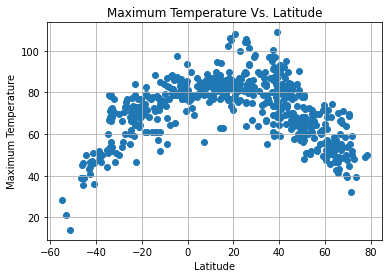

In [20]:
#create scatter plots for lat vs temp, humidity, cloudiness, windspeed
#Lat vs. temp plot

x_values = clean_data['Lat']
y_values = clean_data['Max Temp']

plt.scatter(x_values, y_values)
plt.title('Maximum Temperature Vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.grid()

plt.savefig("output_data/tempVlatinworld.png")
plt.show()

A majority of the cities in the data are in the northern hemisphere and have a max temp of 70-80 degrees Fahrenheit.

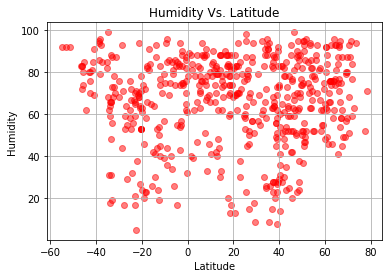

In [21]:
#lat vs. humidity plot

x_values = clean_data['Lat']
y_values = clean_data['Humidity']

plt.scatter(x_values, y_values, color="red", alpha=0.5)
plt.title('Humidity Vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

plt.savefig("output_data/humidVlatinworld.png")
plt.show()


The cities we're analyzing fall within a wide spectrum of humidity levels. Most of the cities have high humidity levels, especially in the nothern hemisphere.

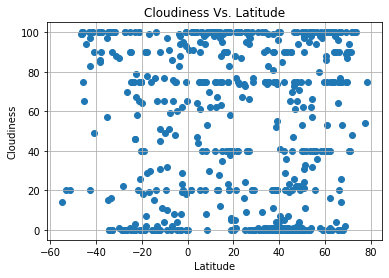

In [22]:
#lat vs. cloudiness plot

x_values = clean_data['Lat']
y_values = clean_data['Clouds']

plt.scatter(x_values, y_values)
plt.title('Cloudiness Vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

plt.savefig("output_data/cloudVlatinworld.png")
plt.show()

Cloudiness seems to be wide spread regardless of where the city might be located. Northern and southern hemispheres see cloudiness, although there are cities that see 0 clouds.

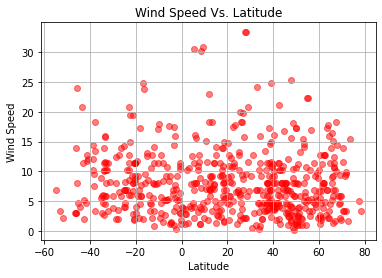

In [23]:
#lat vs. wind speed plot

x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']

plt.scatter(x_values, y_values, color="red", alpha=0.5)
plt.title('Wind Speed Vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

plt.savefig("output_data/windspVlatinworld.png")
plt.show()

The wind speed tends to be on the lower end of the spectrum with a majority of the cities. Many of the cities have about 5-10 wind speed. Most of those cities are in the north.

In [38]:
#create dataframes for southern/norther hemispheres
#use latitude, use loc, greater or equal to 0 nothern, less than southern part
isNorth = clean_data['Lat'] >= 0# mask or filter 
isNorth.value_counts()

True     391
False    176
Name: Lat, dtype: int64

In [39]:
#northern hemisphere dataframe
northern_hem = clean_data.loc[isNorth, :]
northern_hem

,City,Country,Lat,Lon,Max Temp,Humidity,Date,Clouds,Wind Speed
1,kapaa,US,22.08,-159.32,75.20,83,1595340131,40,8.05
2,nouadhibou,MR,20.93,-17.03,80.60,69,1595340133,1,12.75
3,saskylakh,RU,71.92,114.08,49.87,77,1595340134,100,9.51
4,olovyannaya,RU,50.95,115.57,60.75,56,1595340136,31,3.83
5,zhezkazgan,KZ,47.80,67.71,84.20,23,1595340138,75,15.66
...,...,...,...,...,...,...,...,...,...
573,oshkosh,US,44.02,-88.54,69.80,64,1595340734,1,10.29
574,dukat,RU,62.55,155.55,50.56,74,1595340901,100,4.94
576,stornoway,GB,58.21,-6.39,60.01,62,1595340904,40,9.17
578,raga,SS,8.46,25.68,82.54,68,1595340907,0,3.74


In [40]:
#create filter for southern hemisphere
isSouth = clean_data['Lat'] <= 0
isSouth.value_counts()

False    391
True     176
Name: Lat, dtype: int64

In [41]:
#southern hem dataframe

southern_hem = clean_data.loc[isSouth, :]
southern_hem

,City,Country,Lat,Lon,Max Temp,Humidity,Date,Clouds,Wind Speed
0,new norfolk,AU,-42.78,147.06,44.01,80,1595339792,83,1.99
9,punta arenas,CL,-53.15,-70.92,21.20,92,1595340087,20,3.36
12,rikitea,PF,-23.12,-134.97,65.55,66,1595340147,46,20.80
13,faanui,PF,-16.48,-151.75,77.14,84,1595340149,30,23.82
17,mackay,AU,-21.15,149.20,64.40,68,1595340024,100,8.05
...,...,...,...,...,...,...,...,...,...
575,victoria point,AU,-27.58,153.30,60.01,53,1595340903,100,1.99
577,ambilobe,MG,-13.20,49.05,78.04,53,1595340906,2,4.54
580,isangel,VU,-19.55,169.27,69.01,74,1595340910,18,11.74
581,warrnambool,AU,-38.38,142.48,48.99,96,1595340911,86,9.48


The r-squared is: 0.48189073563792056


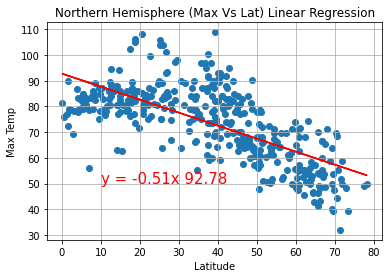

In [42]:
#northern hemisphere max temp vs. latitutde linear regression
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,50), fontsize=15,color="red")

plt.title('Northern Hemisphere (Max Vs Lat) Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/nhemMaxLatReg.png")
plt.show()

The r-squared is: 0.6428522713854684


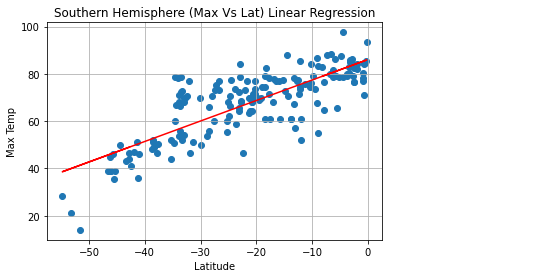

In [43]:
#southern hemisphere max temp vs. latitutde linear regression

x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,50), fontsize=15,color="red")

plt.title('Southern Hemisphere (Max Vs Lat) Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/shemMaxLatReg.png")
plt.show()


The r-squared is: 0.00010531093298437183


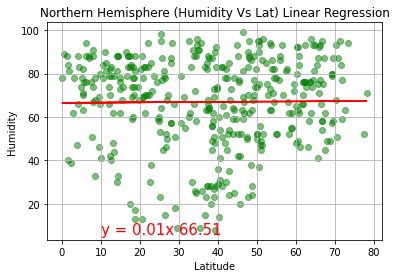

In [44]:
#northern hemisphere lat vs. humidity
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values, color="green", alpha=0.5)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,6), fontsize=15,color="red")

plt.title('Northern Hemisphere (Humidity Vs Lat) Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/nhemHumLatReg.png")
plt.show()

The r-squared is: 0.024173068549317566


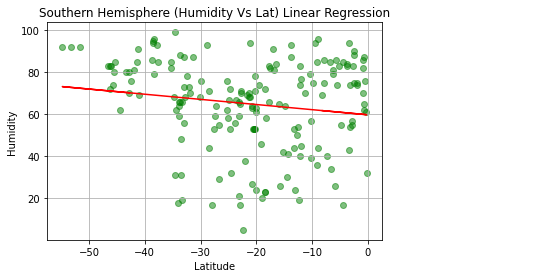

In [45]:
#southern hemisphere lat vs. humidity
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values, color="green", alpha=0.5)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,10), fontsize=15,color="red")

plt.title('Southern Hemisphere (Humidity Vs Lat) Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/shemHumLatReg.png")
plt.show()

The r-squared is: 0.0044268142889937745


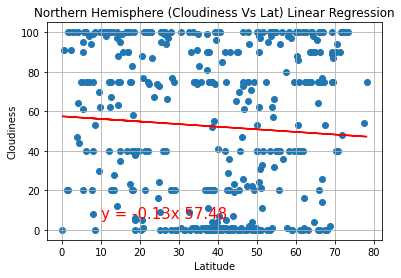

In [46]:
#northern hemisphere lat vs. cloudiness
x_values = northern_hem['Lat']
y_values = northern_hem['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,6), fontsize=15,color="red")

plt.title('Northern Hemisphere (Cloudiness Vs Lat) Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/nhemCloudLatReg.png")
plt.show()

The r-squared is: 0.027425360256679007


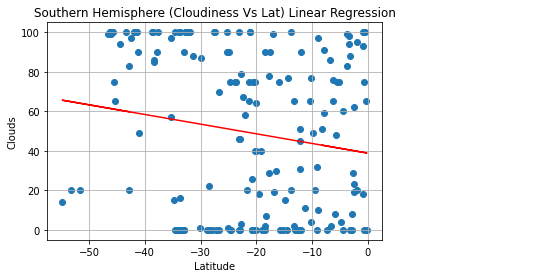

In [47]:
#southern hemisphere lat vs. clouds
x_values = southern_hem['Lat']
y_values = southern_hem['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,6), fontsize=15,color="red")

plt.title('Southern Hemisphere (Cloudiness Vs Lat) Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.grid()

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/shemCloudLatReg.png")
plt.show()

The r-squared is: 0.00509921858743514


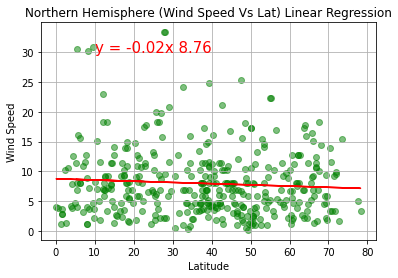

In [48]:
#northern hemisphere wind speed Vs Lat
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values, color="green", alpha=0.5)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,30), fontsize=15,color="red")

plt.title('Northern Hemisphere (Wind Speed Vs Lat) Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/nhemWindLatReg.png")
plt.show()

The r-squared is: 0.008672437672228394


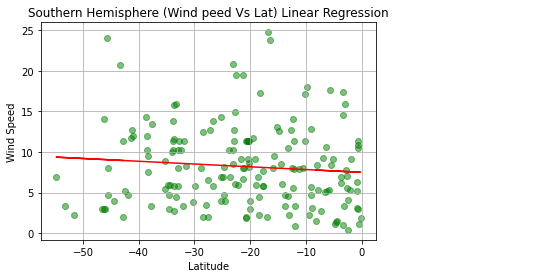

In [49]:
#southern hemisphere lat Vs. wind speed

x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values, color="green", alpha=0.5)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,10), fontsize=15,color="red")

plt.title('Southern Hemisphere (Wind peed Vs Lat) Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/shemWindLatReg.png")
plt.show()